In [1]:
from torchcore.tools.get_statistics import get_garment_overlap_by_category, gen_garment_overlap_heatmap
import os

anno_path = os.path.expanduser('~/data/annotations/fashionpedia_instances_train.pkl')
part='train'
category_num=46
IoR_list = get_garment_overlap_by_category(anno_path, part, category_num,start_from_one=True,max_only=True, set_zero_ind_end=None)


In [2]:
from torchcore.tools.get_statistics import get_dataset_category_statics
cat_statics=get_dataset_category_statics(anno_path, part, names=None)

In [13]:
print(cat_statics)

{'1': 6161.0, '2': 16548.0, '3': 1494.0, '4': 1107.0, '5': 7833.0, '6': 719.0, '7': 12414.0, '8': 2756.0, '9': 5046.0, '10': 3124.0, '11': 18739.0, '12': 922.0, '13': 152.0, '14': 4855.0, '15': 2518.0, '16': 3468.0, '17': 1457.0, '18': 1385.0, '19': 3389.0, '20': 6850.0, '21': 112.0, '22': 4326.0, '23': 2582.0, '24': 46372.0, '25': 7217.0, '26': 1374.0, '27': 135.0, '28': 1226.0, '29': 10159.0, '30': 5972.0, '31': 874.0, '32': 59447.0, '33': 27174.0, '34': 34246.0, '35': 3299.0, '36': 7987.0, '37': 3529.0, '38': 5021.0, '39': 528.0, '40': 1367.0, '41': 588.0, '42': 274.0, '43': 4814.0, '44': 2407.0, '45': 926.0, '46': 335.0}


In [11]:
len(IoR_list[5][31])

28

In [13]:
from torchcore.tools.get_statistics import gen_garment_overlap_heatmap
#heat_mat = gen_garment_overlap_heatmap(IoR_list,category_num,thresh=0.5, mode='category_mean')
# how one garment (accessories) distribute in other garments
heat_mat_self_distribution = gen_garment_overlap_heatmap(IoR_list,category_num,thresh=0.999, mode='size', obj_num=list(cat_statics.values()))
# how one garment contain different garments (parts) 
heat_mat_contain_distribution = gen_garment_overlap_heatmap(IoR_list,category_num,thresh=0.999, mode='size_reverse', obj_num=list(cat_statics.values()))
#heat_mat = gen_garment_overlap_heatmap(IoR_list,category_num,thresh=0.999, mode='mean')

In [9]:
from torchcore.data.datasets.build import build_dataloader
from torchcore.util.config import Config
cfg_path = 'configs/fcos/fcos_resnet50_fpn_fashion_pedia.py'
#cfg_path = 'configs/fcos/fcos_resnet50_fpn_coco.py'
cfg = Config.fromfile(cfg_path)
cfg.dataloader_val.batch_size=1
val_dataset_loader = build_dataloader(cfg.dataloader_val,distributed=False)
json_path = os.path.expanduser('~/data/datasets/Fashionpedia/annotations/instances_attributes_val2020.json')

names = val_dataset_loader.dataset.get_coco_style_names(json_path, with_cat_id=True)

loading annotations into memory...
Done (t=0.11s)
creating index...
index created!


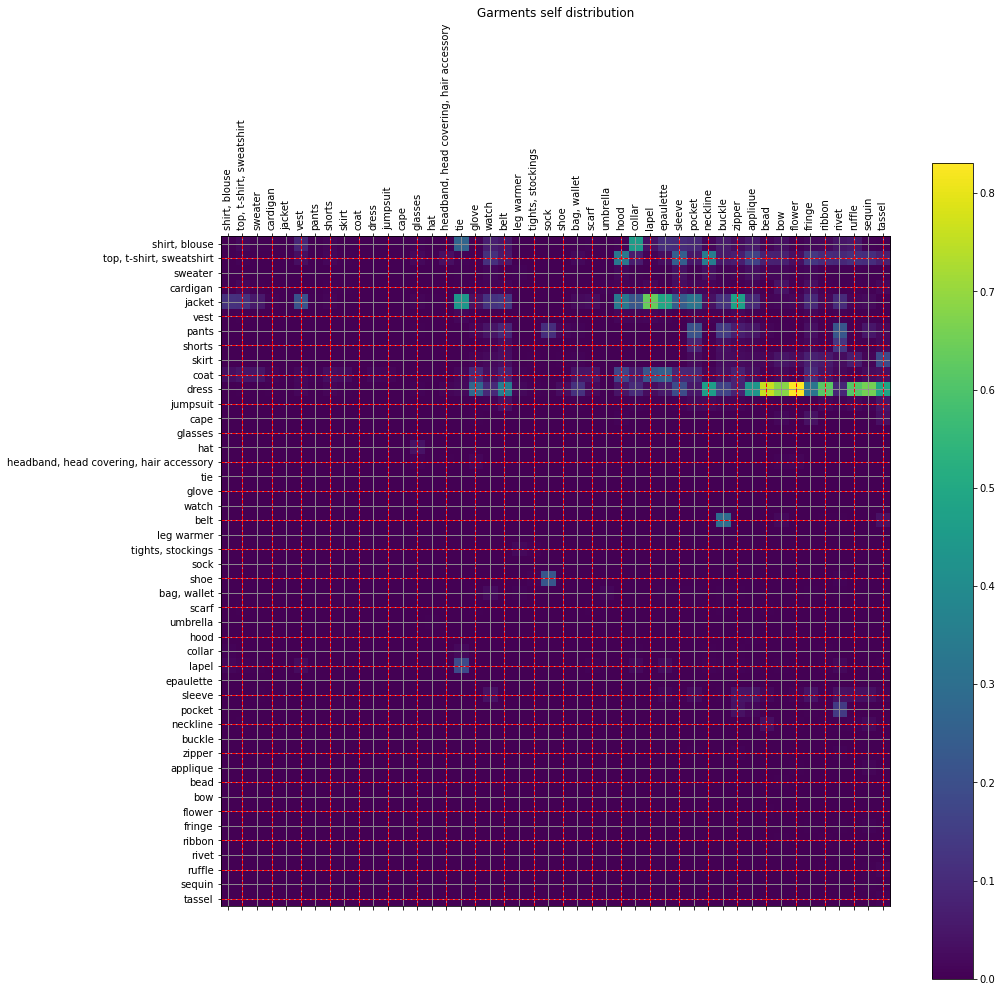

In [11]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.set_title('Garments self distribution')
cax = ax.matshow(heat_mat_self_distribution, interpolation='nearest')
fig.colorbar(cax)

xaxis = np.arange(category_num)
yaxis = np.arange(category_num)
ax.set_xticks(xaxis)
ax.set_yticks(yaxis)
ax.set_xticklabels(list(names.values()), rotation=90)
ax.set_yticklabels(list(names.values()))

for xtick,ytick in zip(plt.xticks()[0],plt.yticks()[0]):
    if xtick % 2 == 0:
        plt.axvline(xtick, color='gray', linestyle='-', linewidth=1, alpha=.5)
    else:
        plt.axvline(xtick, color='red', linestyle='--', linewidth=1, alpha=1)
    if ytick % 2 == 0:
        plt.axhline(ytick, color='gray', linestyle='-', linewidth=1, alpha=.5)
    else:
        plt.axhline(ytick, color='red', linestyle='--', linewidth=1, alpha=1)

plt.grid()
plt.show()

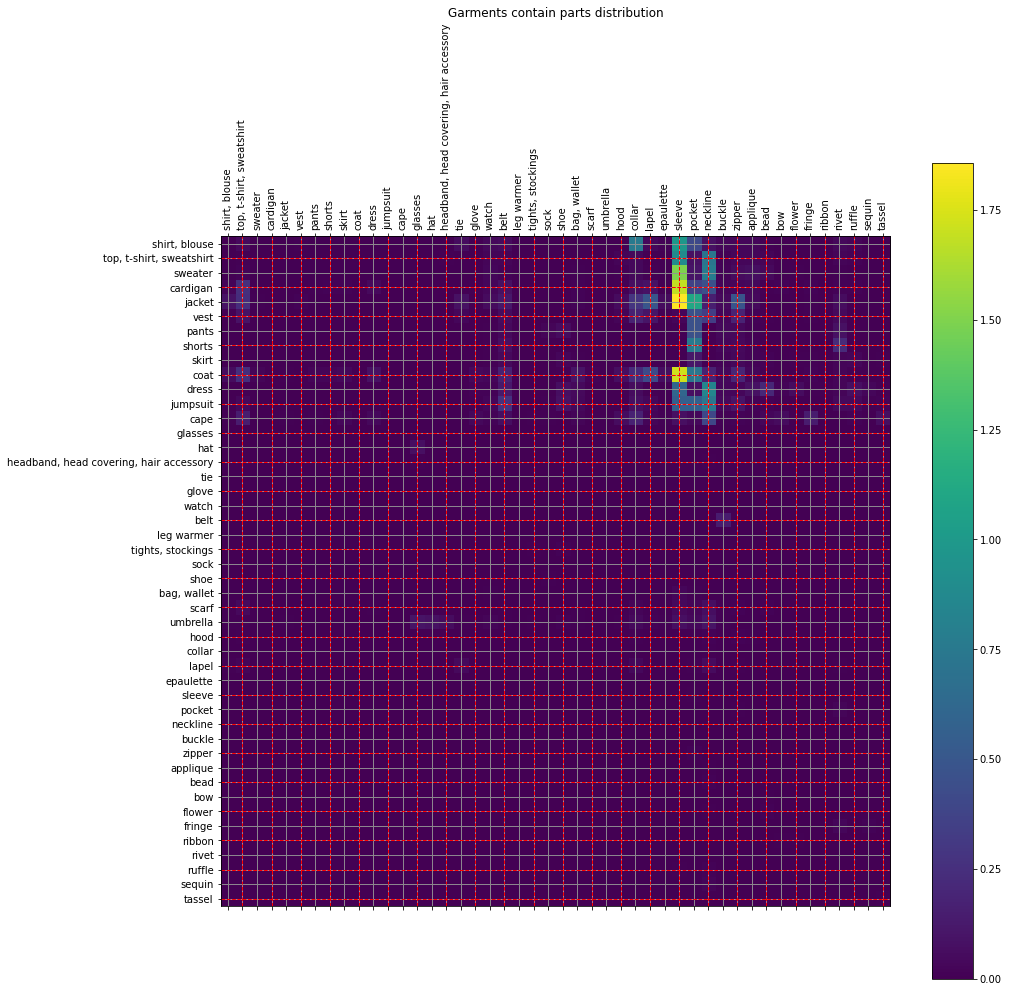

In [14]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.set_title('Garments contain parts distribution')
cax = ax.matshow(heat_mat_contain_distribution, interpolation='nearest')
fig.colorbar(cax)

xaxis = np.arange(category_num)
yaxis = np.arange(category_num)
ax.set_xticks(xaxis)
ax.set_yticks(yaxis)
ax.set_xticklabels(list(names.values()), rotation=90)
ax.set_yticklabels(list(names.values()))

for xtick,ytick in zip(plt.xticks()[0],plt.yticks()[0]):
    if xtick % 2 == 0:
        plt.axvline(xtick, color='gray', linestyle='-', linewidth=1, alpha=.5)
    else:
        plt.axvline(xtick, color='red', linestyle='--', linewidth=1, alpha=1)
    if ytick % 2 == 0:
        plt.axhline(ytick, color='gray', linestyle='-', linewidth=1, alpha=.5)
    else:
        plt.axhline(ytick, color='red', linestyle='--', linewidth=1, alpha=1)

plt.grid()
plt.show()

In [28]:
grammar1 = np.where(heat_mat_self_distribution>0.5)
grammar1 = [(i,j) for i,j in zip(grammar1[0],grammar1[1])]
grammar1_text = [(names[i],names[j]) for i,j in grammar1]

In [32]:
grammar1

[(4, 29), (10, 37), (10, 38), (10, 39), (10, 41), (10, 43), (10, 44)]

In [29]:
grammar1_text

[('jacket', 'lapel'),
 ('dress', 'bead'),
 ('dress', 'bow'),
 ('dress', 'flower'),
 ('dress', 'ribbon'),
 ('dress', 'ruffle'),
 ('dress', 'sequin')]

In [30]:
grammar2 = np.where(heat_mat_contain_distribution>0.5)
grammar2 = [(i,j) for i,j in zip(grammar2[0],grammar2[1])]
grammar2_text = [(names[i],names[j]) for i,j in grammar2]

In [33]:
grammar2

[(0, 28),
 (0, 31),
 (1, 31),
 (1, 33),
 (2, 31),
 (2, 33),
 (3, 31),
 (4, 31),
 (4, 32),
 (7, 32),
 (9, 31),
 (9, 32),
 (10, 31),
 (10, 33),
 (11, 31),
 (11, 32),
 (11, 33)]

In [31]:
grammar2_text

[('shirt, blouse', 'collar'),
 ('shirt, blouse', 'sleeve'),
 ('top, t-shirt, sweatshirt', 'sleeve'),
 ('top, t-shirt, sweatshirt', 'neckline'),
 ('sweater', 'sleeve'),
 ('sweater', 'neckline'),
 ('cardigan', 'sleeve'),
 ('jacket', 'sleeve'),
 ('jacket', 'pocket'),
 ('shorts', 'pocket'),
 ('coat', 'sleeve'),
 ('coat', 'pocket'),
 ('dress', 'sleeve'),
 ('dress', 'neckline'),
 ('jumpsuit', 'sleeve'),
 ('jumpsuit', 'pocket'),
 ('jumpsuit', 'neckline')]

In [45]:
heat_mat[:,31].sum()

0.9280748296178651

In [93]:
with np.printoptions(precision=3, suppress=True):
    print(heat_mat.sum(axis=0))

[0.183 0.239 0.131 0.032 0.013 0.396 0.017 0.094 0.047 0.004 0.021 0.022
 0.    0.113 0.027 0.073 0.983 0.5   0.612 0.904 0.062 0.044 0.35  0.055
 0.24  0.13  0.022 0.94  0.981 0.974 0.999 0.974 0.997 0.988 0.995 0.995
 0.996 0.998 0.983 0.988 0.952 0.931 1.    0.968 0.994 1.   ]


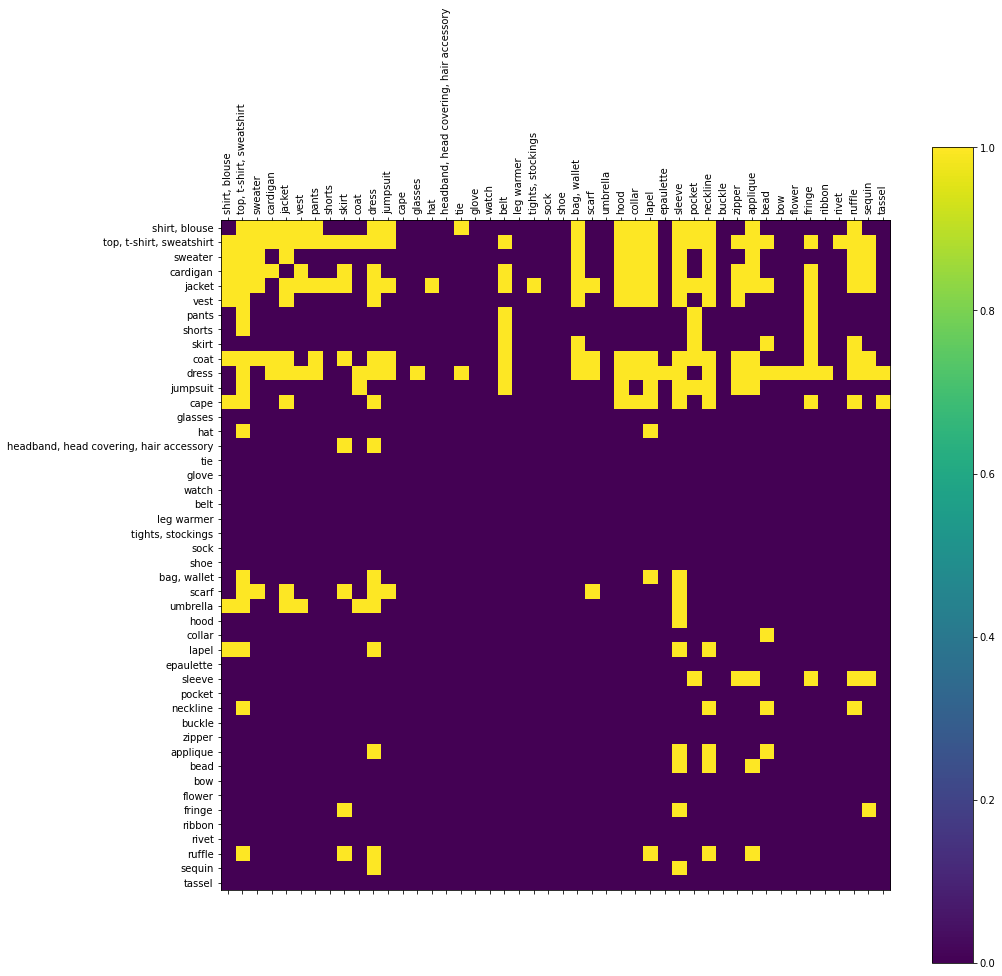

In [18]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(heat_mat, interpolation='nearest')
fig.colorbar(cax)

xaxis = np.arange(category_num)
yaxis = np.arange(category_num)
ax.set_xticks(xaxis)
ax.set_yticks(yaxis)
ax.set_xticklabels(list(names.values()), rotation=90)
ax.set_yticklabels(list(names.values()))

plt.show()

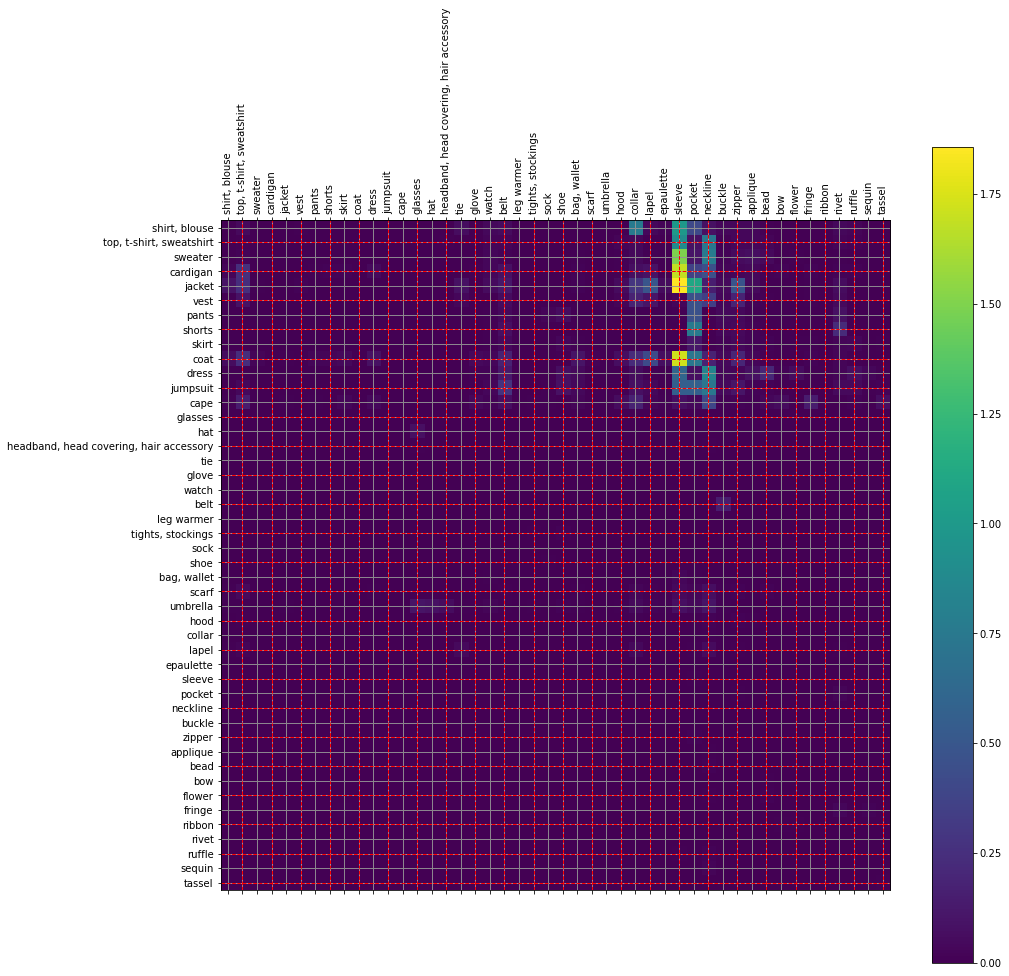

In [6]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(heat_mat, interpolation='nearest')
fig.colorbar(cax)

xaxis = np.arange(category_num)
yaxis = np.arange(category_num)
ax.set_xticks(xaxis)
ax.set_yticks(yaxis)
ax.set_xticklabels(list(names.values()), rotation=90)
ax.set_yticklabels(list(names.values()))

for xtick,ytick in zip(plt.xticks()[0],plt.yticks()[0]):
    if xtick % 2 == 0:
        plt.axvline(xtick, color='gray', linestyle='-', linewidth=1, alpha=.5)
    else:
        plt.axvline(xtick, color='red', linestyle='--', linewidth=1, alpha=1)
    if ytick % 2 == 0:
        plt.axhline(ytick, color='gray', linestyle='-', linewidth=1, alpha=.5)
    else:
        plt.axhline(ytick, color='red', linestyle='--', linewidth=1, alpha=1)

plt.grid()
plt.show()

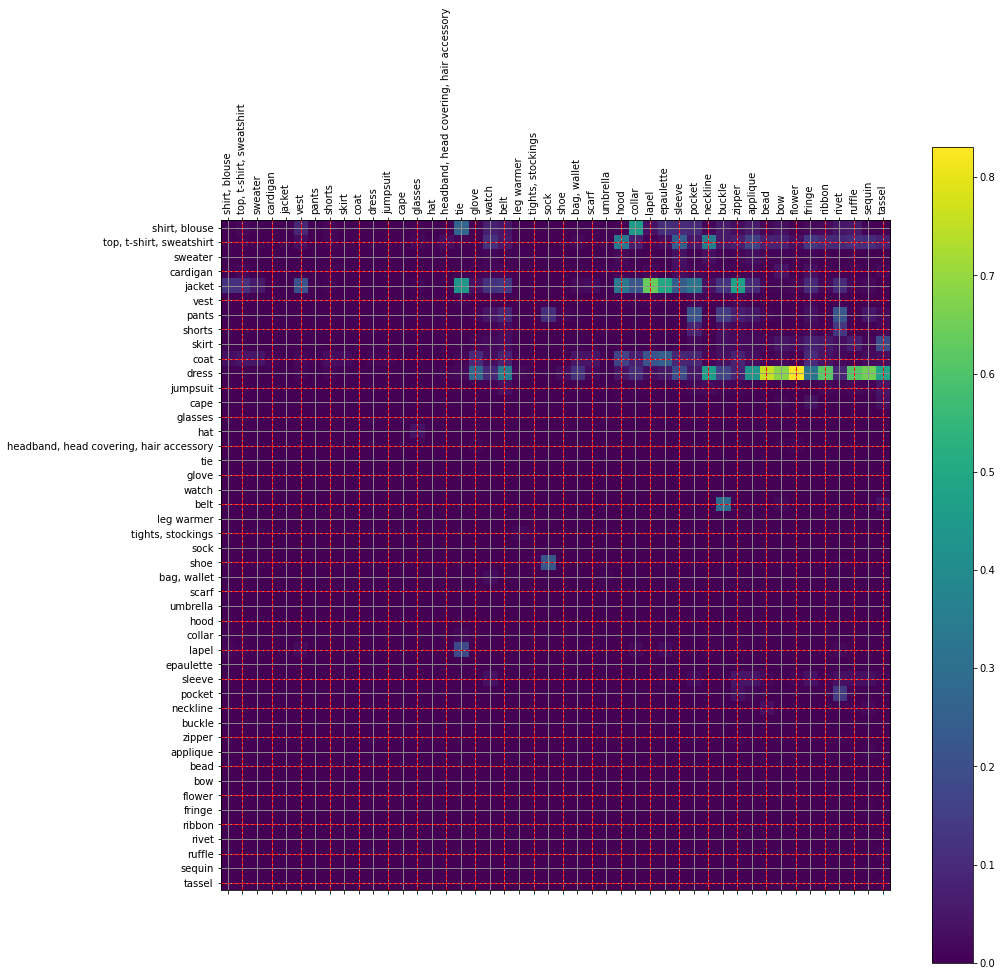

In [95]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(heat_mat, interpolation='nearest')
fig.colorbar(cax)

xaxis = np.arange(category_num)
yaxis = np.arange(category_num)
ax.set_xticks(xaxis)
ax.set_yticks(yaxis)
ax.set_xticklabels(list(names.values()), rotation=90)
ax.set_yticklabels(list(names.values()))

for xtick,ytick in zip(plt.xticks()[0],plt.yticks()[0]):
    if xtick % 2 == 0:
        plt.axvline(xtick, color='gray', linestyle='-', linewidth=1, alpha=.5)
    else:
        plt.axvline(xtick, color='red', linestyle='--', linewidth=1, alpha=1)
    if ytick % 2 == 0:
        plt.axhline(ytick, color='gray', linestyle='-', linewidth=1, alpha=.5)
    else:
        plt.axhline(ytick, color='red', linestyle='--', linewidth=1, alpha=1)

plt.grid()
plt.show()
